# Modelo Ciclo-De-Vida-Mosquitos.

Basado en un modelo Ross/Macdonald enfoncado unicamente en el compartimento $V_s$.

El modelo utiliza los parámetros:
* $\Lambda_v$: Tasa de natalidad de los mosquitos. Este parámetro dependera del tiempo para así obtener algo parecido a una onda senoidal que represente el ciclo de vida de los mosquitos en el año.
* $\mu_v$: Tasa de mortalidad de los mosquitos.

In [150]:
#from google.colab import files
#uploaded = files.upload()

In [151]:
import pandas as pd
import numpy as np

climaRos5Y = pd.read_csv(
    'Climafill.csv',
    na_values='\\N'    # convierte '\N' en NaN
)

#climaRos5Y = pd.read_csv(
#    'ClimaServicio5YRosario.csv',
#    na_values='\\N'    # convierte '\N' en NaN
#)

# ffill
climaRos5Y['TMED'] = climaRos5Y['TMED'].ffill()

 #usar las columnas correctas:
#tmedRos5Y  = np.array(climaRos5Y['TMED'], dtype=float)
tmedRos5Y = np.array(climaRos5Y['TMED'], dtype=float)

#idx = np.where(tmedRos5Y!= tmedRos5YFILL)[0]

#for i in idx:
#    print(i, tmedRos5Y[i], tmedRos5YFILL[i])



##print(idx)


In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Modelo.

Por problemas del minimize luego en la parte de búsqueda de parámetros, conviene reemplazar $(H_s + H_i + H_r)$ por $N_h$.

De lo contrario por el funcionamiento interno de minimize, cada uno de esos compartimentos decrece demasiado y termina dividiendo por cero.



In [153]:
def CicloMosquitos_model(x,t):
    k = 0.265
    # Desarmamos el vector
    Vs, = x

    # Planteamos la ecuacion
    dVs_dt = k*lam_v(t) * Vs - mu_v * Vs # Tasa de natalidad (respecto del tiempo)
                                 # Tasa de mortalidad (parámetro fijo)
    return [dVs_dt]

# Parámetros.

In [154]:
# Parameters

mu_v = 1/10 # Tasa de mortalidad de los mosquitos. Se busca que sea aprox. 20 días.

# Definición de las constantes
T = 365.0       # Periodo = 1827 días / 5 anios
D = mu_v        # Valor medio = 0.1
A = 1/20        # Amplitud (para que no sea negativa)
B = 2 * np.pi / T # Frecuencia angular


def birth_rate_temp(temp, T_opt=28, sigma=6):
    """Tasa normalizada de 0 a 1 según temperatura."""
    val = np.exp(-0.5 * ((temp - T_opt) / sigma)**2)
    return max(val, 0)


def T(t):
  index = int(np.floor(t))

  if index > lenClimaRos5Y - 1:
    return 0

  return max (1 - abs ((tmedRos5Y [index] - 25) / 10) , 0)

def lam_v(t):
    return T(t)

#lam_v = lambda t: A*np.sin(B * t) + D

# Condiciones iniciales.

In [155]:
# Initial conditions

Nv = 1 # Total población de mosquitos
Vs_0 = Nv # Total mosquitos susceptibles

x0 = [Vs_0] # Vector inicial

# Simulación del tiempo.

In [156]:
# Time solution -> Básicamente genera el eje x.
t_start = 0.0
t_end = 1826.0 # Cinco años
num_points = 1827 # 1:1 para que se correspondan con los días
time_points = np.linspace(t_start, t_end, num_points) # Genera 1827 puntos entre 0 y 1826 equiespaciados.

# Cálculo de soluciones.

In [157]:
params = [lam_v, mu_v]
sol = odeint(CicloMosquitos_model, x0, time_points,rtol=1e-3, atol=1e-6)
#sol = odeint(CicloMosquitos_model, x0, time_points,rtol=1e-6, atol=1e-12)


Vs = sol
#print(Vs)

# Ploteo.

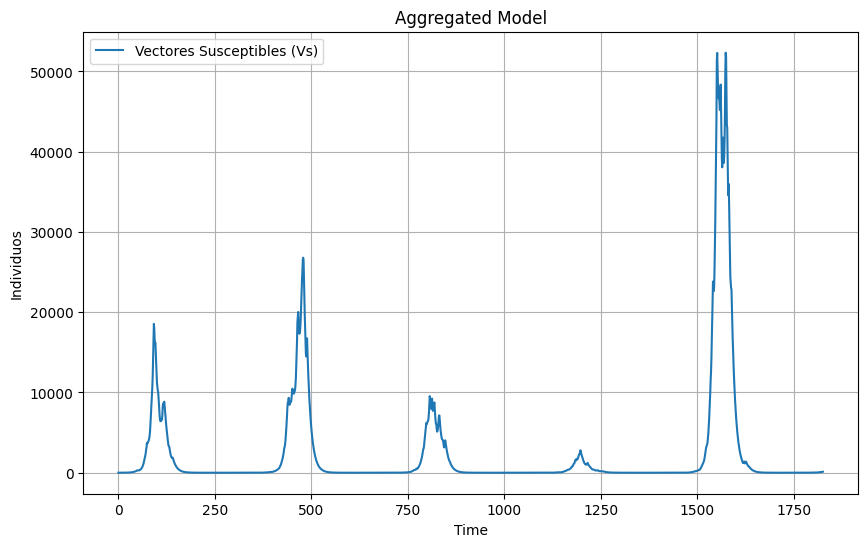

In [158]:
plt.figure(figsize=(10, 6))
plt.plot(time_points, Vs, label='Vectores Susceptibles (Vs)')
#plt.plot(time_points, temp5Y, label='Temperatura')
#x_ticks_desired = np.arange(0, 730 + 1, 100)
#plt.xticks(x_ticks_desired)
plt.title('Aggregated Model')
plt.xlabel('Time')
plt.ylabel('Individuos')
plt.grid(True)
plt.legend()
plt.show()